In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Leer csv
df=pd.read_csv('GBvideos_cc50_202101.csv')
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Devon,50.700405,-3.529950,POINT (-3.529950197 50.70040529)
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Manchester,53.500415,-2.247987,POINT (-2.247987103 53.50041526)
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Bath And North East Somerset,51.383749,-2.350022,POINT (-2.350022218 51.3837486)
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797)
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,Southampton,50.900031,-1.399977,POINT (-1.399976849 50.90003135)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Plymouth,50.385386,-4.159989,POINT (-4.159989259 50.38538576)
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Omagh,54.600012,-7.300004,POINT (-7.300004315 54.60001223)
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,Kent,51.133712,1.300013,POINT (1.300013386 51.13371218)
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,Glasgow,55.874405,-4.250707,POINT (-4.250707236 55.87440472)


In [4]:
#Adaptando los datos tipo Date
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
state                       0
lat                         0
lon                         0
geometry                    0
dtype: int64

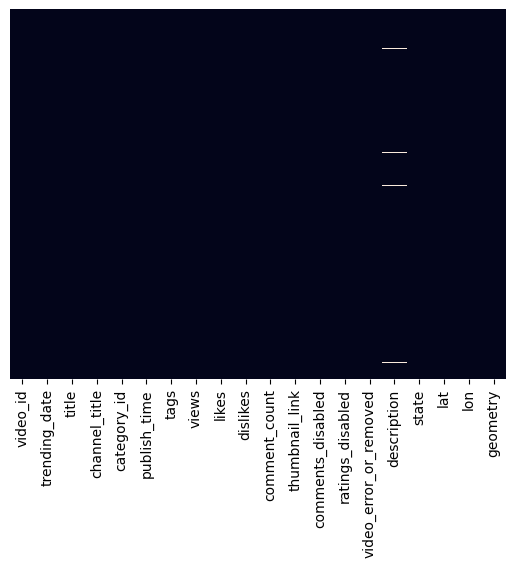

In [5]:
#Usar mapa de calor para verificar valores vacios
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
#Detalle de datos faltantes por columnas:
df.isnull().sum()

In [6]:
df[df.description.isnull()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
91,_wM_jY_rass,2017-11-14,Bone on Labour HQ,Ross Kempsell,25,2017-11-06 16:12:58,[none],159065,1160,1164,0,https://i.ytimg.com/vi/_wM_jY_rass/default.jpg,True,False,False,NaN,Bristol,51.449998,-2.583315,POINT (-2.583315472 51.44999778)
118,8HON4AswPVk,2017-11-14,Arvo Pärt - Tabula Rasa,JSaxofone,10,2012-09-13 12:35:46,"Arvo|""Pärt""|""Tabula""|""Rasa""|""part""|""violin""|""c...",728177,4007,71,240,https://i.ytimg.com/vi/8HON4AswPVk/default.jpg,False,False,False,NaN,Dungannon,54.520379,-6.670017,POINT (-6.670016929 54.52037884)
187,j5AILysDDTI,2017-11-14,Brad Bufanda Demo Reel,EinsteinEnt,24,2010-09-02 20:48:37,Brad Bufanda (Film Actor),154054,16,10,19,https://i.ytimg.com/vi/j5AILysDDTI/default.jpg,False,False,False,NaN,Derry,55.000375,-7.333284,POINT (-7.333283937 55.00037539)
309,_wM_jY_rass,2017-11-15,Bone on Labour HQ,Ross Kempsell,25,2017-11-06 16:12:58,[none],160381,1168,1170,0,https://i.ytimg.com/vi/_wM_jY_rass/default.jpg,True,False,False,NaN,Swansea,51.629987,-3.950002,POINT (-3.950002077 51.6299868)
336,8HON4AswPVk,2017-11-15,Arvo Pärt - Tabula Rasa,JSaxofone,10,2012-09-13 12:35:46,"Arvo|""Pärt""|""Tabula""|""Rasa""|""part""|""violin""|""c...",729358,4016,71,240,https://i.ytimg.com/vi/8HON4AswPVk/default.jpg,False,False,False,NaN,Dundee,56.470389,-3.000008,POINT (-3.000008384 56.47038902)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38511,H08xgoXkpa8,2018-06-12,Snoop Dogg Weighs In On Kanye's Controversial ...,The View,24,2018-05-24 15:49:26,"Snoop Dogg|""Kanye West""|""slavery""|""race""|""love...",939527,10918,1666,2959,https://i.ytimg.com/vi/H08xgoXkpa8/default.jpg,False,False,False,NaN,Dundee,56.470389,-3.000008,POINT (-3.000008384 56.47038902)
38560,vjSohj-Iclc,2018-06-12,"Getting some air, Atlas?",BostonDynamics,28,2018-05-10 19:56:28,"Dynamic robots|""Boston Dynamics""|""humanoid rob...",6781236,86991,3143,13586,https://i.ytimg.com/vi/vjSohj-Iclc/default.jpg,False,False,False,NaN,Luton,51.880359,-0.420011,POINT (-0.420010825 51.88035911)
38639,JXZG_Qcm6Nw,2018-06-13,Sheldon makes a friend and invites him for din...,kunal gawade,10,2018-06-06 06:34:07,"#Youngsheldon|""#youngsheldon""|""#sheldon""|""#jim...",368022,2303,109,222,https://i.ytimg.com/vi/JXZG_Qcm6Nw/default.jpg,False,False,False,NaN,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797)
38735,vjSohj-Iclc,2018-06-13,"Getting some air, Atlas?",BostonDynamics,28,2018-05-10 19:56:28,"Dynamic robots|""Boston Dynamics""|""humanoid rob...",6791996,87079,3145,13591,https://i.ytimg.com/vi/vjSohj-Iclc/default.jpg,False,False,False,NaN,Stoke On Trent,53.000368,-2.180007,POINT (-2.180006756 53.00036826)


In [7]:
#Datos faltantes:
#Identificar valores nulos
df.isnull().sum()

#Reemplazar valores faltantes que se encuentran sin descripción con el texto "No descripction"
df=df.fillna(value='No description.')

In [8]:
#Verificar filas duplicadas
df[df.duplicated()==True].count()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
dtype: int64

In [9]:
#Total de comentarios desabilitados
(df.comments_disabled==True).sum()

683

In [10]:
#Total de rating deshabilitado
(df.ratings_disabled==True).sum()

272

In [11]:
#Total de rating deshabilitado
(df.video_error_or_removed==True).sum()


69

<Axes: >

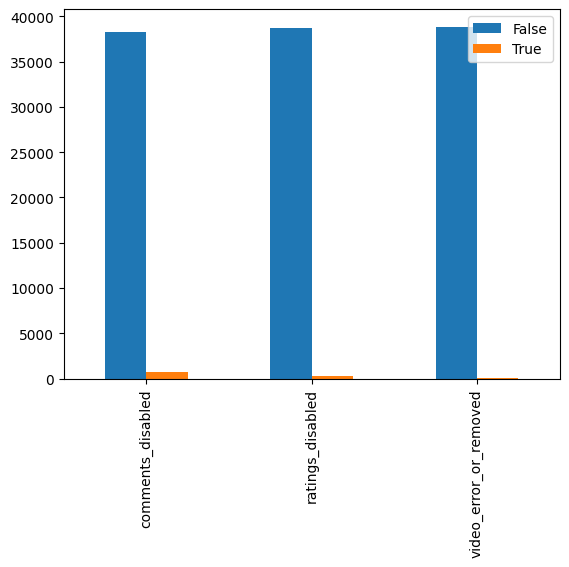

In [12]:
#Detectar valores booleanos
test=df.select_dtypes(include='bool')
counts = test.apply(pd.Series.value_counts).transpose()

counts.plot(kind='bar')

In [13]:
#Eliminar columnas con datos innecesarios (comments_disabled, ratings_disabled,video_error,thumbail_link y tags)
df=df.drop(["comments_disabled","ratings_disabled", "video_error_or_removed","thumbnail_link" ,"tags"],axis=1)

<Axes: >

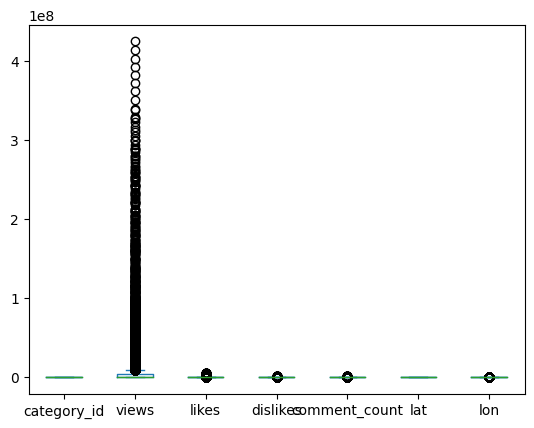

In [14]:
#limpieza de los datos

#Identificar outliers
df.plot.box()

<Axes: xlabel='views'>

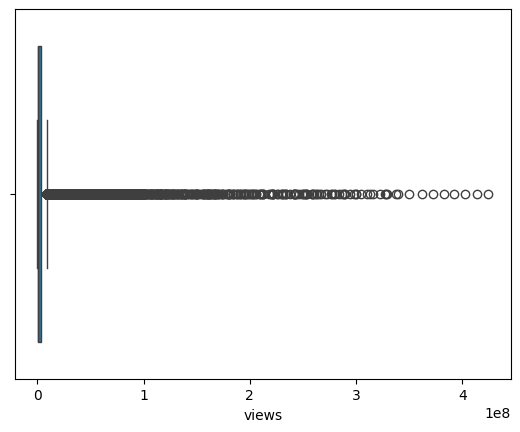

In [15]:
#Visualización outliers

sns.boxplot(df["views"],orient='y')

<Axes: xlabel='likes'>

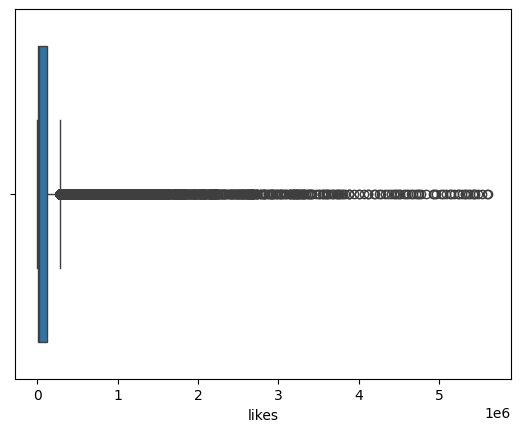

In [16]:
sns.boxplot(df["likes"],orient='y')

<Axes: xlabel='dislikes'>

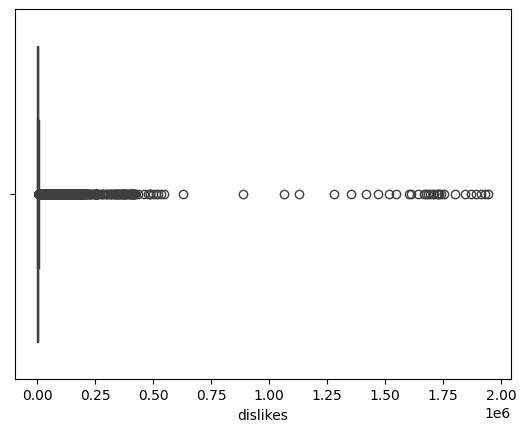

In [17]:
sns.boxplot(df["dislikes"],orient='y')

<Axes: xlabel='comment_count'>

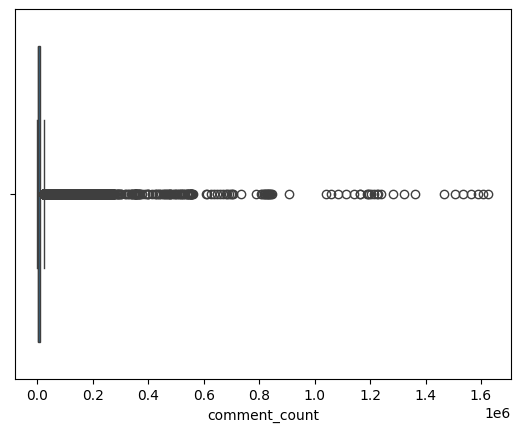

In [18]:
sns.boxplot(df["comment_count"],orient='y')

In [19]:

# Lee el archivo JSON
with open('GB_category_id.json') as f:
    data = json.load(f)

# Inicializa listas para cada columna
category_ids = []
titles = []

# Itera a través de los elementos y extrae la información
for item in data['items']:
    category_ids.append(item['id'])
    titles.append(item['snippet']['title'])
# Crea el DataFrame
newdf = pd.DataFrame({
    'category_id': category_ids,
    'title_category': titles,
})

# Muestra el DataFrame
print(newdf)

   category_id        title_category
0            1      Film & Animation
1            2      Autos & Vehicles
2           10                 Music
3           15        Pets & Animals
4           17                Sports
5           18          Short Movies
6           19       Travel & Events
7           20                Gaming
8           21         Videoblogging
9           22        People & Blogs
10          23                Comedy
11          24         Entertainment
12          25       News & Politics
13          26         Howto & Style
14          27             Education
15          28  Science & Technology
16          30                Movies
17          31       Anime/Animation
18          32      Action/Adventure
19          33              Classics
20          34                Comedy
21          35           Documentary
22          36                 Drama
23          37                Family
24          38               Foreign
25          39                Horror
2

In [20]:
#Agregando datos de la categoria de video segun el archivo .json 
df['category_id'] = df['category_id'].astype(type(newdf['category_id'].iloc[0]))
df = pd.merge(df, newdf, on='category_id', how='left')


In [21]:
#Creación nuevas columnas:


#Min max scaling (comment counts)
df["comment_count_scaled"] = (df["comment_count"] - df["comment_count"].min()) / (df["comment_count"].max() - df["comment_count"].min())


# Crea una nueva columna 'popularidad' con valores basados en los intervalos
df['popularity'] = pd.cut(df['views'], bins=[0, 10000, 100000, 1000000, 10000000, float('inf')],
                           labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


# Crea una nueva columna 'aceptación' con valores basados en likes y dislikes
df['public_acceptance'] = (df["likes"])/(df["likes"]+df["dislikes"])
df


,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,description,state,lat,lon,geometry,title_category,comment_count_scaled,popularity,public_acceptance
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29,7224515,55681,10247,9479,Click here to continue the story and make your...,Devon,50.700405,-3.529950,POINT (-3.529950197 50.70040529),Howto & Style,0.005828,High,0.844573
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44,1053632,25561,2294,2757,Musical guest Taylor Swift performs …Ready for...,Manchester,53.500415,-2.247987,POINT (-2.247987103 53.50041526),Entertainment,0.001695,High,0.917645
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,17158579,787420,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,Bath And North East Somerset,51.383749,-2.350022,POINT (-2.350022218 51.3837486),Music,0.077394,Very High,0.947740
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 02:30:38,27833,193,12,37,Salford drew 4-4 against the Class of 92 and F...,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797),Sports,0.000023,Low,0.941463
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13,9815,30,2,30,Dashcam captures truck's near miss with child ...,Southampton,50.900031,-1.399977,POINT (-1.399976849 50.90003135),News & Politics,0.000018,Very Low,0.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09 07:00:01,25066952,268088,12783,9933,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Plymouth,50.385386,-4.159989,POINT (-4.159989259 50.38538576),Music,0.006107,Very High,0.954488
38912,IP8k2xkhOdI,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11 17:09:16,1492219,61998,13781,24330,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Omagh,54.600012,-7.300004,POINT (-7.300004315 54.60001223),Music,0.014958,High,0.818142
38913,Il-an3K9pjg,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08 11:05:08,29641412,394830,8892,19988,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,Kent,51.133712,1.300013,POINT (1.300013386 51.13371218),Music,0.012289,Very High,0.977975
38914,-DRsfNObKIQ,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08 20:32:32,14317515,151870,45875,26766,Eleni Foureira represented Cyprus at the first...,Glasgow,55.874405,-4.250707,POINT (-4.250707236 55.87440472),Entertainment,0.016456,Very High,0.768009


In [22]:
#Exportar dataset

df.to_csv("GB_videos.csv")